# Team 6 - World Cup

![](https://img.fifa.com/image/upload/t_l4/v1543921822/ex1ksdevyxwsgu7rzdv6.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/abecklas/fifa-world-cup)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- Is there a way to integrate the data from all 3 datasets?
- It seems like the `winners` dataset doesn't have data of World Cup 2018. Can you Google the relevant information and add it to the dataset using `pandas`?
- The format of some number columns in `matches` dataset doesn't look right.
- Can you seperate the Date and the Time of `Datetime` column in `matches` dataset?
- And more...

In [1]:
# Start your codes here!
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!ls '/content/drive/My Drive/Colab Notebooks/Dev C Challenge/Week 4/Homework/assignments/data/06-world-cup'

matches.csv  players.csv  winners.csv


In [6]:
matches=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Dev C Challenge/Week 4/Homework/assignments/data/06-world-cup/matches.csv")
players=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Dev C Challenge/Week 4/Homework/assignments/data/06-world-cup/players.csv")
winners=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Dev C Challenge/Week 4/Homework/assignments/data/06-world-cup/winners.csv")

In [8]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [9]:
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [10]:
winners.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [14]:
print(players['MatchID'].isna().sum())
print(matches['MatchID'].isna().sum())

0
3720


In [15]:
print(len(players['MatchID'].unique()))
print(len(matches['MatchID'].unique()))

836
837


In [22]:
players[players['Position'].notna()]

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
5,201,1096,MEX,LUQUE Juan (MEX),S,0,Rafael GARZA,C,NaN
12,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex VILLAPLANE,C,NaN
33,201,1090,USA,MILLAR Bob (USA),S,0,Jimmy DOUGLAS,GK,NaN
...,...,...,...,...,...,...,...,...,...
37752,255959,300186501,GER,LOEW Joachim (GER),S,16,LAHM,C,NaN
37760,255959,300186501,GER,LOEW Joachim (GER),N,12,ZIELER,GK,NaN
37761,255959,300186501,ARG,SABELLA Alejandro (ARG),N,12,ORION,GK,NaN
37762,255959,300186501,GER,LOEW Joachim (GER),N,22,WEIDENFELLER,GK,NaN


In [23]:
players.describe()

,RoundID,MatchID,Shirt Number
count,3.778400e+04,3.778400e+04,37784.000000
mean,1.105647e+07,6.362233e+07,10.726022
std,2.770144e+07,1.123916e+08,6.960138
min,2.010000e+02,2.500000e+01,0.000000
25%,2.630000e+02,1.199000e+03,5.000000
50%,3.370000e+02,2.216000e+03,11.000000
75%,2.559310e+05,9.741000e+07,17.000000
max,9.741060e+07,3.001865e+08,23.000000


In [24]:
matches.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,852.000000,852.000000,852.000000,850.000000,852.000000,852.000000,8.520000e+02,8.520000e+02
mean,1985.089202,1.811033,1.022300,45164.800000,0.708920,0.428404,1.066177e+07,6.134687e+07
std,22.448825,1.610255,1.087573,23485.249247,0.937414,0.691252,2.729613e+07,1.110572e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188750e+03
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.191000e+03
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


In [25]:
a = matches.groupby('Home Team Name').sum()
sort=a.sort_values(by='Home Team Goals', ascending=False)
sort=sort.drop(columns=["RoundID", 'MatchID', 'Attendance', 'Year','Half-time Home Goals','Half-time Away Goals', 'Away Team Goals'])

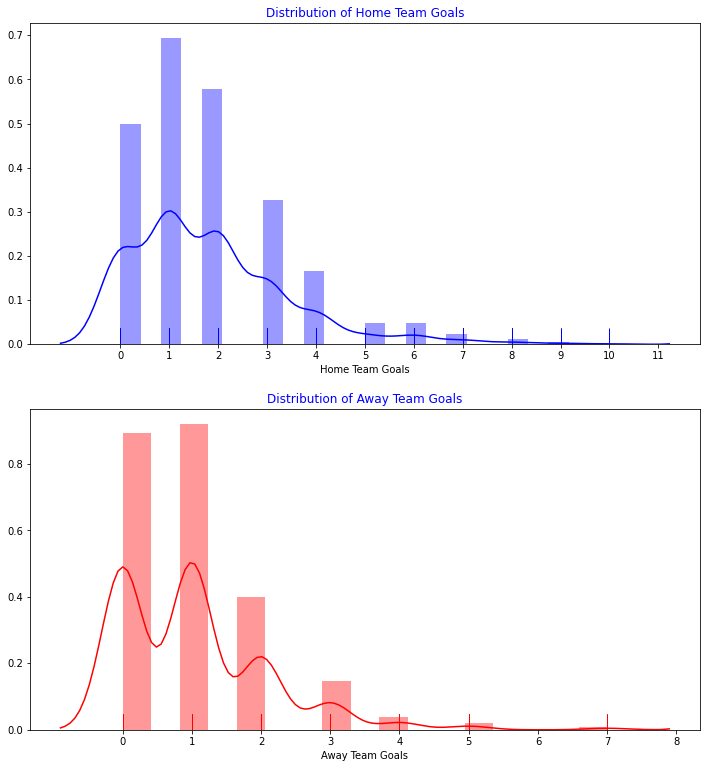

In [26]:
plt.figure(figsize=(12,13))
plt.subplot(211)
sns.distplot(matches["Home Team Goals"],color="b",rug=True)
plt.xticks(np.arange(0,12,1))
plt.title("Distribution of Home Team Goals",color='b')


plt.subplot(212)
sns.distplot(matches["Away Team Goals"],color="r",rug=True)
plt.xticks(np.arange(0,9,1))
plt.title("Distribution of Away Team Goals",color='b')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1623: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  color=self.colors, align="center", **kws)


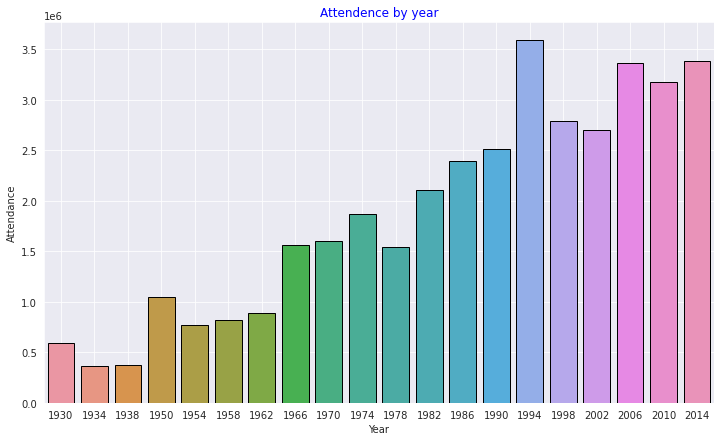

In [27]:
matches.isnull().sum()
sns.set_style("darkgrid")

#removing duplicate rows for match id column 
matches = matches.drop_duplicates(subset="MatchID",keep="first")

#remob=ving null values
matches = matches[matches["Year"].notnull()]

att = matches.groupby("Year")["Attendance"].sum().reset_index()
att["Year"] = att["Year"].astype(int)
plt.figure(figsize=(12,7))
sns.barplot(att["Year"],att["Attendance"],linewidth=1,edgecolor="k"*len(att))
plt.grid(True)
plt.title("Attendence by year",color='b')
plt.show()

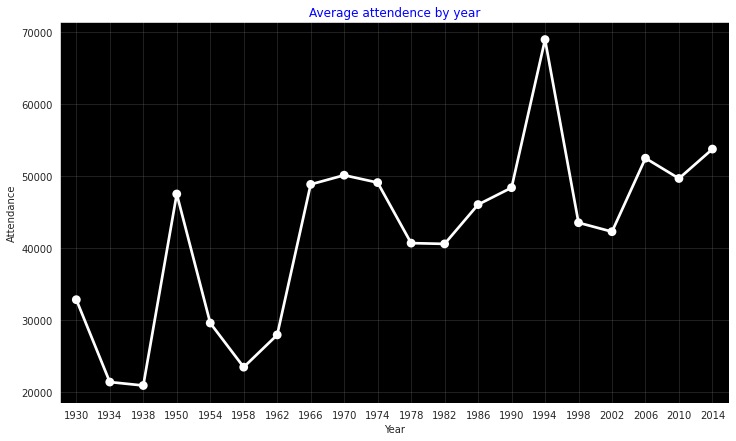

In [28]:
att1 = matches.groupby("Year")["Attendance"].mean().reset_index()
att1["Year"] = att1["Year"].astype(int)
plt.figure(figsize=(12,7))
ax = sns.pointplot(att1["Year"],att1["Attendance"],color="w")
ax.set_facecolor("k")
plt.grid(True,color="grey",alpha=.3)
plt.title("Average attendence by year",color='b')
plt.show()

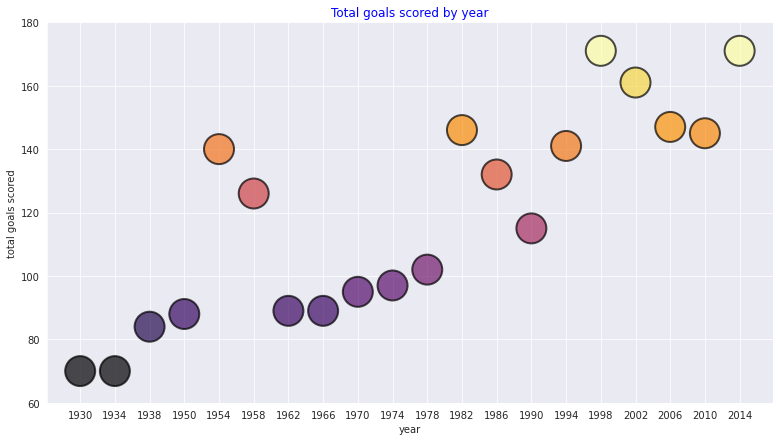

In [29]:
plt.figure(figsize=(13,7))
winners["Year1"] = winners["Year"].astype(str)
ax = plt.scatter("Year1","GoalsScored",data=winners,
            c=winners["GoalsScored"],cmap="inferno",
            s=900,alpha=.7,
            linewidth=2,edgecolor="k",)

#plt.colorbar()
plt.xticks(winners["Year1"].unique())
plt.yticks(np.arange(60,200,20))
plt.title('Total goals scored by year',color='b')
plt.xlabel("year")
plt.ylabel("total goals scored")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1623: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  color=self.colors, align="center", **kws)


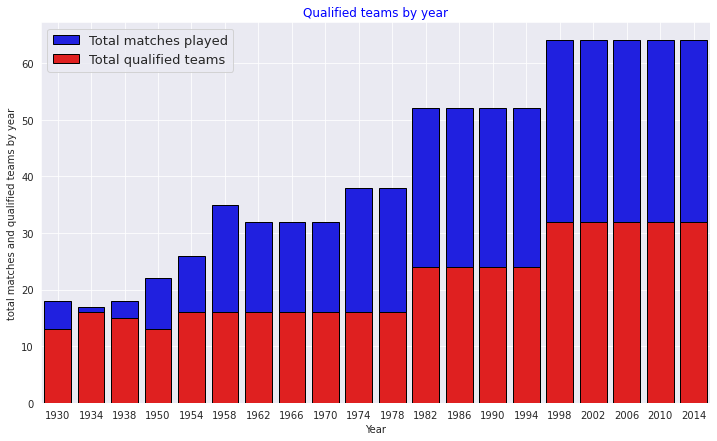

In [30]:
plt.figure(figsize=(12,7))
sns.barplot(winners["Year"],winners["MatchesPlayed"],linewidth=1,
            edgecolor="k"*len(winners),color="b",label="Total matches played")
sns.barplot(winners["Year"],winners["QualifiedTeams"],linewidth=1,
            edgecolor="k"*len(winners),color="r",label="Total qualified teams")
plt.legend(loc="best",prop={"size":13})
plt.title("Qualified teams by year",color='b')
plt.grid(True)
plt.ylabel("total matches and qualified teams by year")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1623: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  color=self.colors, align="center", **kws)


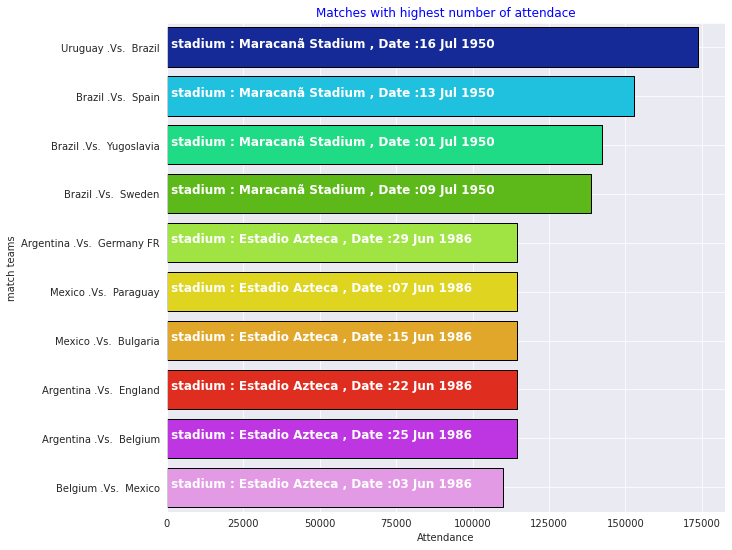

In [31]:
h_att = matches.sort_values(by="Attendance",ascending=False)[:10]
h_att = h_att[['Year', 'Datetime','Stadium', 'City', 'Home Team Name',
              'Home Team Goals', 'Away Team Goals', 'Away Team Name', 'Attendance', 'MatchID']]
h_att["Stadium"] = h_att["Stadium"].replace('Maracan� - Est�dio Jornalista M�rio Filho',"Maracanã Stadium")
h_att["Datetime"] = h_att["Datetime"].str.split("-").str[0]
h_att["mt"] = h_att["Home Team Name"] + " .Vs.  " + h_att["Away Team Name"]

plt.figure(figsize=(10,9))
ax = sns.barplot(y =h_att["mt"],x = h_att["Attendance"],palette="gist_ncar",
                 linewidth = 1,edgecolor="k"*len(h_att))
plt.ylabel("match teams")
plt.xlabel("Attendance")
plt.title("Matches with highest number of attendace",color='b')
plt.grid(True)
for i,j in enumerate(" stadium : "+h_att["Stadium"]+" , Date :" + h_att["Datetime"]):
    ax.text(.7,i,j,fontsize = 12,color="white",weight = "bold")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1623: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  color=self.colors, align="center", **kws)


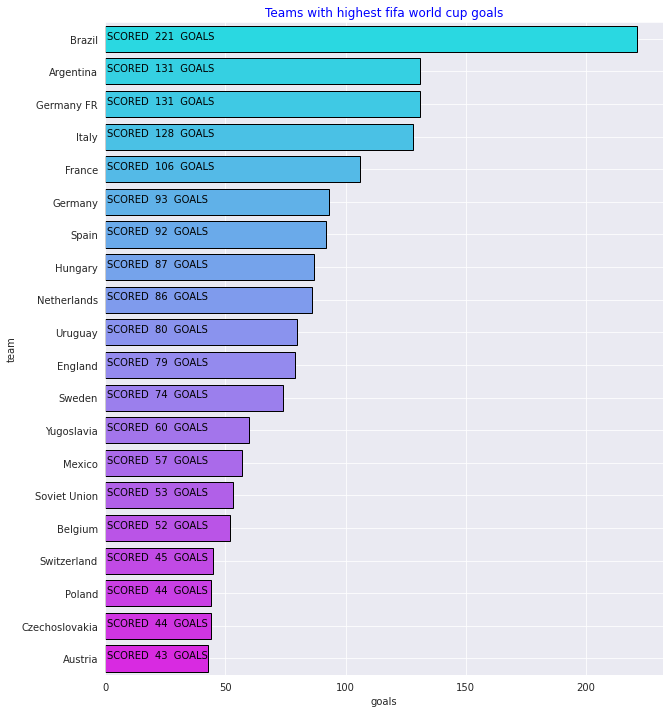

In [32]:
tt_gl_h = matches.groupby("Home Team Name")["Home Team Goals"].sum().reset_index()
tt_gl_h.columns = ["team","goals"]

tt_gl_a = matches.groupby("Away Team Name")["Away Team Goals"].sum().reset_index()
tt_gl_a.columns = ["team","goals"]

total_goals = pd.concat([tt_gl_h,tt_gl_a],axis=0)
total_goals = total_goals.groupby("team")["goals"].sum().reset_index()
total_goals = total_goals.sort_values(by="goals",ascending =False)
total_goals["goals"] = total_goals["goals"].astype(int)

plt.figure(figsize=(10,12))
ax= sns.barplot("goals","team",data=total_goals[:20],palette="cool",
                linewidth=1,edgecolor="k"*20)

for i,j in enumerate("SCORED  " +total_goals["goals"][:20].astype(str) + "  GOALS"):
    ax.text(.7,i,j,fontsize = 10,color="k")

plt.title("Teams with highest fifa world cup goals",color='b')
plt.grid(True)
plt.show()